In [1]:
%matplotlib inline 
# This turns on inline plotting, where plot graphics will appear in notebook.

In [2]:
from util.devices import find_device
from data_action.transformations import *
from data_action.data_loader import *
from util.image_plot import plot_images
from model.model_cifar import ModelCifar
from learning.train import train
from learning.validate import test
from util.graph_plot import plot_me

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [3]:
device = find_device()
batch_size = 100

data_loader = Data_Loader(device, batch_size)

trainloader = data_loader.load_training_data()
testloader = data_loader.load_testing_data()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device: cuda

Loading training data. Dataset: CIFAR10
Files already downloaded and verified
Training data loaded

Loading testing data.
Files already downloaded and verified
Test data loaded



Let us show some of the training images, for fun.



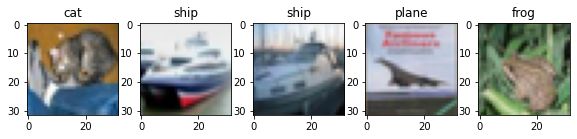

In [4]:

# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images and their labels
plot_images(images, classes, labels)


2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [5]:
net = ModelCifar().to(device)

In [6]:
!pip install torchsummary
from torchsummary import summary

summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 64, 16, 16]             640
             ReLU-11           [-1, 64, 16, 16]               0
      BatchNorm2d-12           [-1, 64, 16, 16]             128
          Dropout-13           [-1, 64, 16, 16]               0
           Conv2d-14          [-1, 128,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



loss=2.2984607219696045 batch_id=0:   0%|          | 1/500 [00:00<00:54,  9.20it/s]Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 1
loss=0.9656047224998474 batch_id=499: 100%|██████████| 500/500 [00:40<00:00, 12.30it/s]
\Train set: Accuracy: 25187/50000 (50.3740%)

loss=0.9805428981781006 batch_id=1:   0%|          | 2/500 [00:00<00:44, 11.27it/s]
Test set: Average loss: 0.9947, Accuracy: 6490/10000 (64.90%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 2
loss=0.8489006757736206 batch_id=499: 100%|██████████| 500/500 [00:40<00:00, 12.30it/s]
\Train set: Accuracy: 33791/50000 (67.5820%)

loss=0.7235900163650513 batch_id=1:   0%|          | 2/500 [00:00<00:44, 11.25it/s]
Test set: Average loss: 0.8429, Accuracy: 7129/10000 (71.29%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 3
loss=0.7769889831542969 batch_id=499: 100%|██████████| 500/500 [00:40<00:00, 12.30it/s]
\Train set: Accuracy: 36501/50000 (73.0020%)

loss=0.6542906761169434 batch_id=1:   0%|   

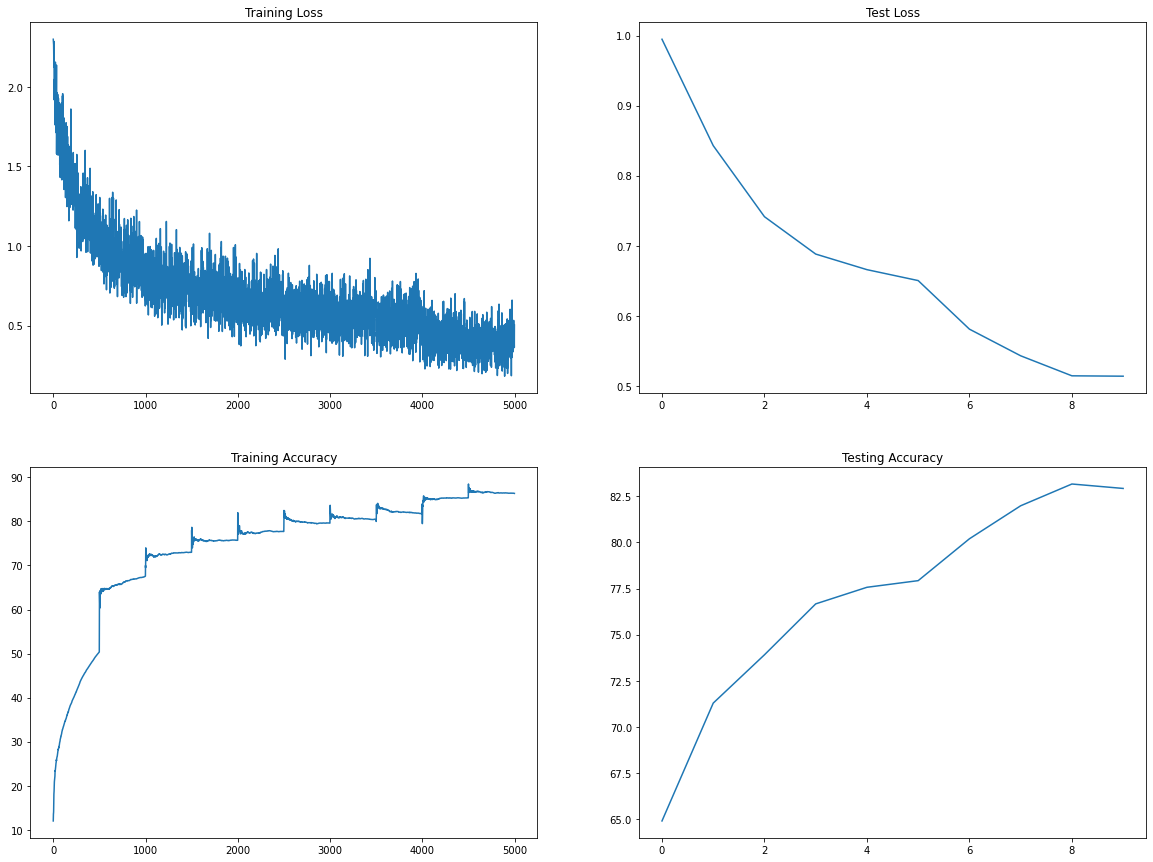

In [7]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

optimizer = optim.SGD(net.parameters(), lr=0.2, momentum=0.9)
scheduler = StepLR(optimizer, step_size= 8, gamma= 0.5, verbose = True)

for epoch in range(10):  # loop over the dataset multiple times
    print(f'Epoch: {epoch+1}')
    train(net, device, trainloader, train_loss, train_accuracy, optimizer)
    test(net, device, testloader, test_loss, test_accuracy)
    scheduler.step()

plot_me(train_loss, train_accuracy, test_loss, test_accuracy)


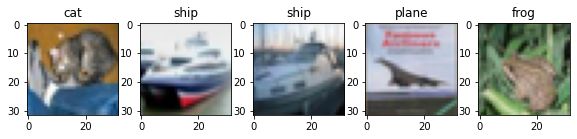

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
plot_images(images, classes, labels)

In [9]:
outputs = net(images.to(device))

In [10]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 82 %


In [12]:
from util.classwise_performance import clswse_perf

clswse_perf(net, testloader, device, batch_size, classes)

Accuracy of plane : 85 %
Accuracy of   car : 93 %
Accuracy of  bird : 79 %
Accuracy of   cat : 60 %
Accuracy of  deer : 87 %
Accuracy of   dog : 69 %
Accuracy of  frog : 92 %
Accuracy of horse : 83 %
Accuracy of  ship : 92 %
Accuracy of truck : 85 %
